**Автор: Сергеев Константин Олегович (ММОВС23)**

# Poetry Ranker

## Загрузка данных - дамп chitalnya.ru

In [ ]:
import json
import pandas as pd

In [ ]:
with open('poetry_data_train.json', 'r', encoding='utf-8') as f:
    data_train = json.load(f)

with open('poetry_data_test.json', 'r', encoding='utf-8') as f:
    data_test = json.load(f)

df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)
print('Размер train: ', df_train.shape)
print('Размер test: ', df_test.shape)
df_train

Размер train:  (138396, 5)
Размер test:  (34599, 5)


,url,rating,views,output_text,genre
0,https://www.chitalnya.ru/work/3180020/,29,33,Люблю ли осень? Ты спроси у ели -\nОна в колюч...,лирика
1,https://www.chitalnya.ru/work/2496512/,0,29,Подруга - злая похмелюга\nУжасно вредная порой...,юмор
2,https://www.chitalnya.ru/work/2300891/,73,110,На качелях настроенья\nМы сегодня улетели\nВ р...,лирика
3,https://www.chitalnya.ru/work/3109869/,44,67,"Знаешь, Света, с тобой мне просто:\nУ тебя жив...",лирика
4,https://www.chitalnya.ru/work/3382840/,0,12,"Клянемся, будем помнить погибших мы всегда,\nИ...",лирика
...,...,...,...,...,...
138391,https://www.chitalnya.ru/work/1153818/,0,136,Как трудно мне определиться -\nЧервяк я в жизн...,юмор
138392,https://www.chitalnya.ru/work/2873976/,74,84,"Осенний дождь... Холодный. Хмурый.\nСтучит, ст...",лирика
138393,https://www.chitalnya.ru/work/3140150/,0,10,"Ничто не проходит бесследно и даром\nНичто, ни...",лирика
138394,https://www.chitalnya.ru/work/2433508/,30,88,"Я предам тебя сейчас,\nКину в радости и в горе...",лирика


## EDA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Пропуски

In [ ]:
print('train')
df_train.isna().sum()

train


url            0
rating         0
views          0
output_text    0
genre          0
dtype: int64

In [ ]:
print('test')
df_test.isna().sum()

test


url            0
rating         0
views          0
output_text    0
genre          0
dtype: int64

***Пропусков нету***

### Типы данных

In [ ]:
print('train')
df_train.dtypes

train


url            object
rating         object
views           int64
output_text    object
genre          object
dtype: object

In [ ]:
print('test')
df_test.dtypes

test


url            object
rating         object
views           int64
output_text    object
genre          object
dtype: object

***Приводим rating к int***

In [ ]:
df_train['rating'] = df_train['rating'].astype(int)
df_test['rating'] = df_test['rating'].astype(int)

### URL

In [ ]:
print('train')
df_train.url.value_counts()

train


https://www.chitalnya.ru/work/3180020/    1
https://www.chitalnya.ru/work/3676977/    1
https://www.chitalnya.ru/work/3754419/    1
https://www.chitalnya.ru/work/1143146/    1
https://www.chitalnya.ru/work/3165913/    1
                                         ..
https://www.chitalnya.ru/work/2829791/    1
https://www.chitalnya.ru/work/2265048/    1
https://www.chitalnya.ru/work/1622193/    1
https://www.chitalnya.ru/work/601104/     1
https://www.chitalnya.ru/work/2975796/    1
Name: url, Length: 138396, dtype: int64

In [ ]:
print('test')
df_test.url.value_counts()

test


https://www.chitalnya.ru/work/2999707/    1
https://www.chitalnya.ru/work/1864452/    1
https://www.chitalnya.ru/work/123139/     1
https://www.chitalnya.ru/work/3314718/    1
https://www.chitalnya.ru/work/3050632/    1
                                         ..
https://www.chitalnya.ru/work/2277916/    1
https://www.chitalnya.ru/work/387421/     1
https://www.chitalnya.ru/work/2951723/    1
https://www.chitalnya.ru/work/2293819/    1
https://www.chitalnya.ru/work/886981/     1
Name: url, Length: 34599, dtype: int64

***Дублей нету***

### Rating - целевая переменная

In [ ]:
print('train')
print('min: ', df_train.rating.min())
print('mean: ', df_train.rating.mean())
print('max: ', df_train.rating.max())
print('median: ', df_train.rating.median())
df_train.rating.value_counts()

train
min:  0
mean:  11.92026503656175
max:  851
median:  0.0


0      77985
7       9315
2       7425
1       5090
9       2771
       ...  
318        1
398        1
334        1
386        1
851        1
Name: rating, Length: 440, dtype: int64

In [ ]:
print('test')
print('min: ', df_test.rating.min())
print('mean: ', df_test.rating.mean())
print('max: ', df_test.rating.max())
print('median: ', df_test.rating.median())
df_test.rating.value_counts()

test
min:  0
mean:  12.109309517616117
max:  1145
median:  0.0


0      19373
7       2318
2       1903
1       1269
9        727
       ...  
342        1
205        1
360        1
471        1
457        1
Name: rating, Length: 326, dtype: int64

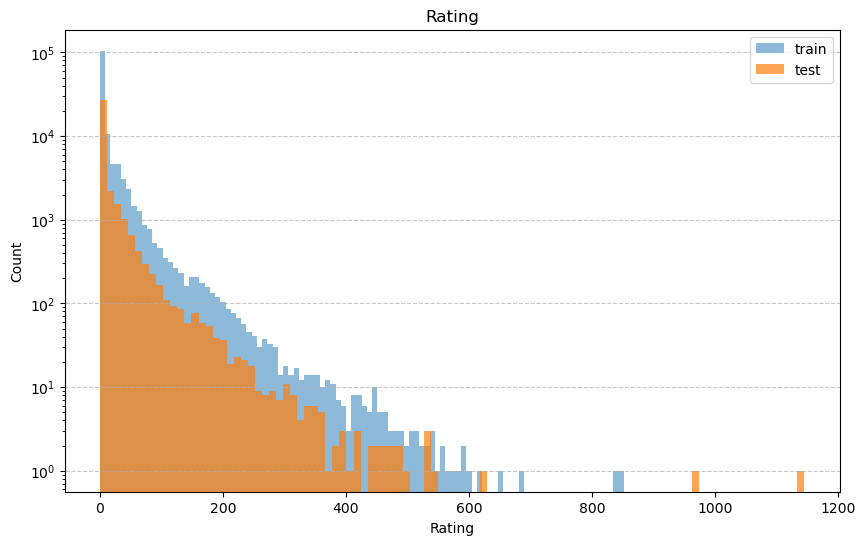

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['rating'], bins=100, label='train', alpha=0.5)
plt.hist(df_test['rating'], bins=100, label='test', alpha=0.7)
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Views

In [ ]:
print('train')
print('min: ', df_train.views.min())
print('mean: ', df_train.views.mean())
print('max: ', df_train.views.max())
print('median: ', df_train.views.median())
df_train.views.value_counts()

train
min:  10
mean:  132.44228879447382
max:  76680
median:  51.0


11      3427
10      3345
12      3264
13      3122
14      2895
        ... 
2220       1
1816       1
2911       1
3184       1
3459       1
Name: views, Length: 2134, dtype: int64

In [ ]:
print('test')
print('min: ', df_test.views.min())
print('mean: ', df_test.views.mean())
print('max: ', df_test.views.max())
print('median: ', df_test.views.median())
df_test.views.value_counts()

test
min:  10
mean:  130.92572039654326
max:  23568
median:  51.0


11      852
12      836
10      823
13      795
14      756
       ... 
3483      1
2812      1
5693      1
648       1
2784      1
Name: views, Length: 1240, dtype: int64

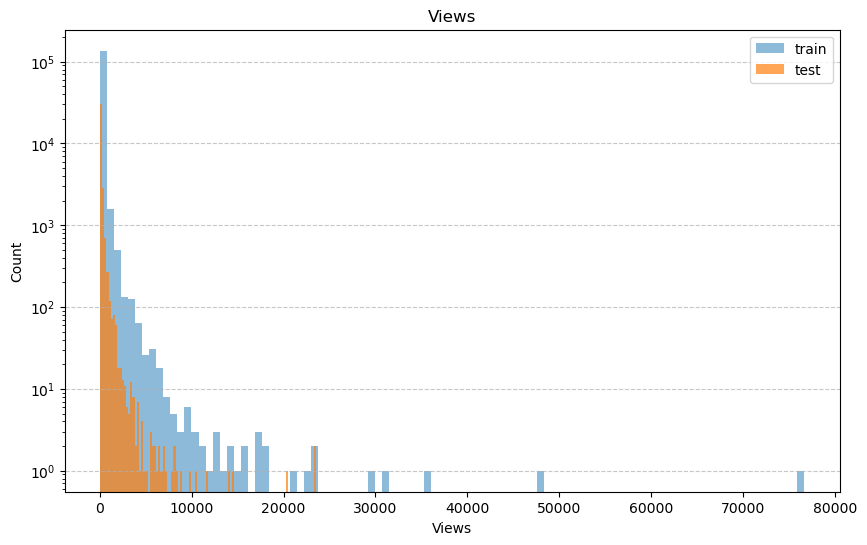

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['views'], bins=100, label='train', alpha=0.5)
plt.hist(df_test['views'], bins=100, label='test', alpha=0.7)
plt.title('Views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Output_text

In [ ]:
print('train')
print('min len: ', df_train.output_text.apply(len).min())
print('mean len: ', df_train.output_text.apply(len).mean())
print('max len: ', df_train.output_text.apply(len).max())
print('median len: ', df_train.output_text.apply(len).median())
df_train.output_text.apply(len).value_counts()

train
min len:  22
mean len:  477.0960576895286
max len:  19996
median len:  426.0


99      307
98      287
107     278
109     276
105     274
       ... 
2922      1
2332      1
3609      1
2184      1
4994      1
Name: output_text, Length: 2470, dtype: int64

In [ ]:
print('test')
print('min len: ', df_test.output_text.apply(len).min())
print('mean len: ', df_test.output_text.apply(len).mean())
print('max len: ', df_test.output_text.apply(len).max())
print('median len: ', df_test.output_text.apply(len).median())
df_test.output_text.apply(len).value_counts()

test
min len:  30
mean len:  475.9472528107749
max len:  7485
median len:  425.0


109     81
107     78
389     77
438     76
101     75
        ..
1784     1
1485     1
2379     1
1227     1
33       1
Name: output_text, Length: 1724, dtype: int64

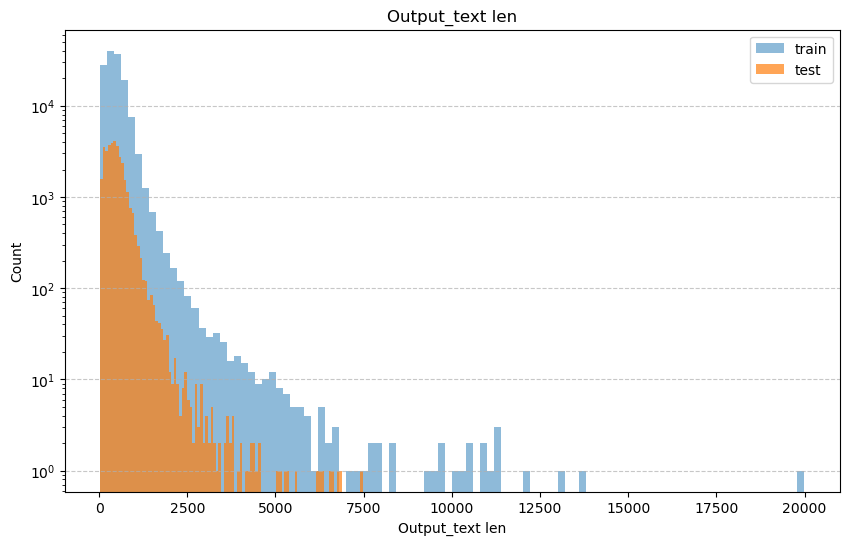

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['output_text'].apply(len), bins=100, label='train', alpha=0.5)
plt.hist(df_test['output_text'].apply(len), bins=100, label='test', alpha=0.7)
plt.title('Output_text len')
plt.xlabel('Output_text len')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Genre

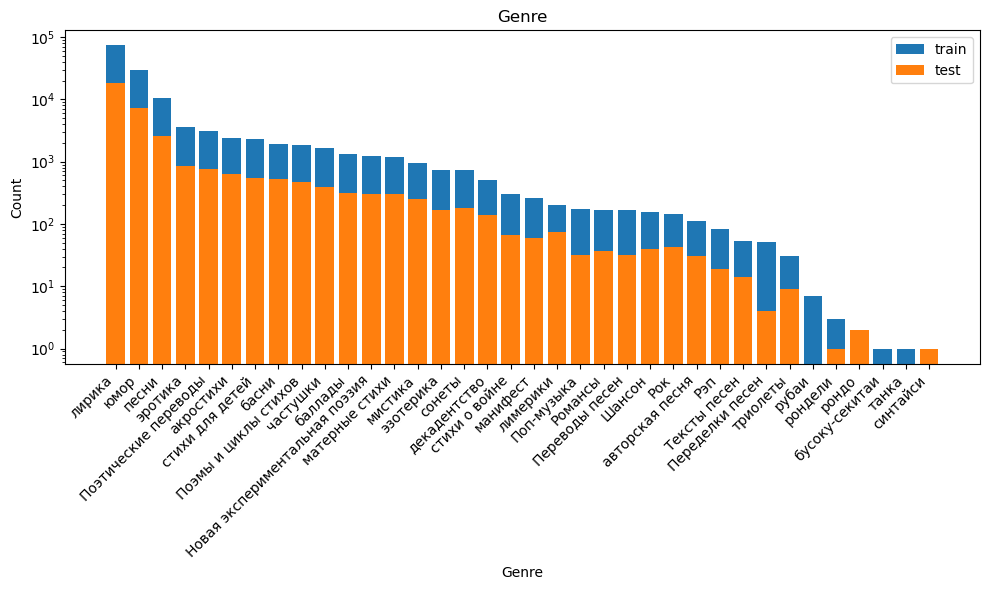

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_train['genre'].value_counts().index, df_train['genre'].value_counts().values, label='train')
plt.bar(df_test['genre'].value_counts().index, df_test['genre'].value_counts().values, label='test')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Genre')
plt.legend()
plt.tight_layout()
plt.show()

- Уберём слишком редкие жанры
- Заведём жанр Unknown, для стихотворений с неизвестными жанрами на входе системы
- Присвоим 10% случайным примерам жанр Unknown

In [ ]:
bad_genres = ['рубаи', 'рондели', 'рондо', 'бусоку-секитаи', 'танка', 'синтайси']

df_train['genre'] = df_train['genre'].apply(lambda genre: 'Unknown' if genre in bad_genres else genre[0].upper() + genre[1:])
df_test['genre'] = df_test['genre'].apply(lambda genre: 'Unknown' if genre in bad_genres else genre[0].upper() + genre[1:])

_, train_indices_to_replace = train_test_split(df_train.index, test_size=0.1, stratify=df_train['genre'], random_state=42)
df_train.loc[train_indices_to_replace, 'genre'] = 'Unknown'

_, test_indices_to_replace = train_test_split(df_test.index, test_size=0.1, stratify=df_test['genre'], random_state=42)
df_test.loc[test_indices_to_replace, 'genre'] = 'Unknown'

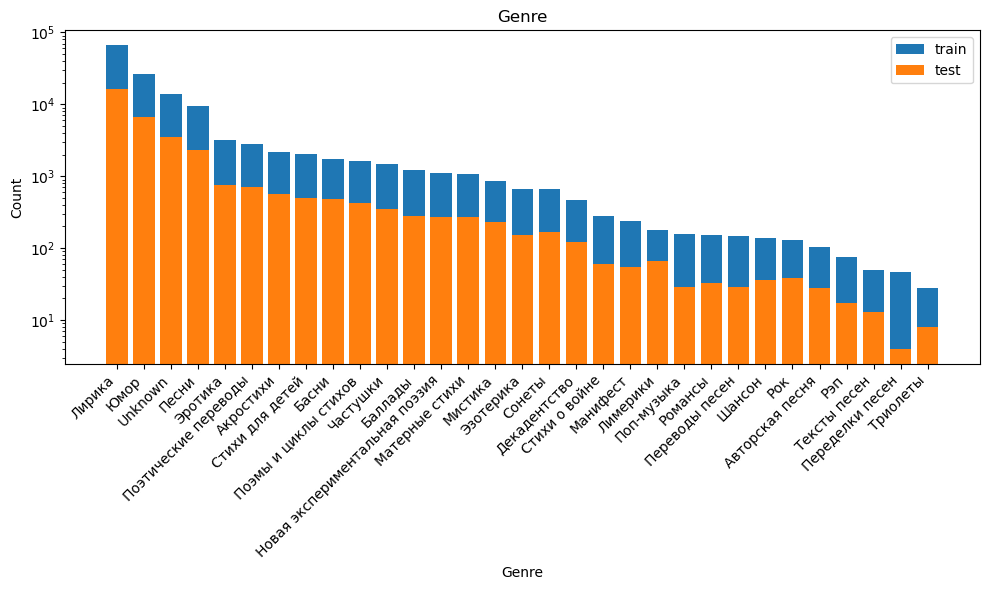

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_train['genre'].value_counts().index, df_train['genre'].value_counts().values, label='train')
plt.bar(df_test['genre'].value_counts().index, df_test['genre'].value_counts().values, label='test')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Genre')
plt.legend()
plt.tight_layout()
plt.show()

## Сохраняем данные

In [ ]:
df_train.to_parquet('df_train.parq')
df_test.to_parquet('df_test.parq')

## Выводы

- Колонка "url" может быть использована, если покажется что для верного ранжирования нам всё таки не хватает ещё каких-то мета-данных
- Целевая переменная - "rating", её диапазон от 0 до n > 1_000, её следует нормализовать для удобного предсказания моделью, так как большинство оценок = 0, то оптимальным диапазоном для предсказания кажется: от 0 до +-5, так как точка 0 в нём двигаться не будет. Нормализация должно учитывать, что в основном оценки распределены около 0 и растянуть этот диапазон, а не сжать в точку 0. Кажется поэтому здесь хорошо подойдёт не Min-Max нормализация, а преобразование log(x+1), и предсказывать именно такие значения. При работе модели в режиме скоринга, можно возвращать оригинальные значения с помощью применения обратной функции: round(exp(max(x, 0))-1).
- Основной признак в примерах - текст (колонка "output_text"), при токенизации будем ограничивать до 512 токенов, и в некоторых примерах будем обрезать значительную часть текста. Это нужно будет учесть и при плохих результатах рассмотреть эксперименты с лонгформерами.
- Колонка "views" говорит о надёжности примеров, так как коррелирует с количеством проставленных оценок, а чем больше оценок, тем валиднее средняя оценка. Её можно будет попробовать нормализовать и использовать для взвешивания примеров, но нужно внимательней отнестись к нормализации, чтобы не вышло 1.0 вес у одного примера и 0 у всех остальных, веса примеров должны лишь немного отклоняться от 1.0. Например здесь подойдёт преобразование log(x), затем нормализация по всем примерам, чтобы сумма всех весов была равна количеству примеров.
- Колонка "genre" является в нашем случае condition, так как ожидаю, что для каждого жанра свои специфичные критерии. Выше мы правильно завели новый жанр "Unknown", чтобы система смогла работать со стихами неизвестного жанра и была более универсальной. Жадный подход заключается в обучении своей модели на каждый жанр, но для быстрой разработки попробую обучить одну модель, использующую информацию о жанре с помощью внедрения жанра в начало примера, отделяя от основного текста токеном - [SEP]. Также жанры стоит писать на русском языке, чтобы модель быстрее поняла смысл каждого жанра по его названию, предобученными эмбедингами.
- При обучении модели стоит провести эксперименты с отключением влияния колонок "views" и "genre", так как нету 100% уверенности что подходы к их использованию в модели будут реализованы верно и что эти параметры впринципе влияют на "rating".

## Обучение модели

### Предварительный анализ:

- Выберем архитектуру - BERT, кажется это самый стандартный подход в такой задаче регресии по тексту
- Так как в постановке задаче мы всё таки говорим про общий ранжировщик, а не только модель скоринга, то метрик типо: MSE, RMSE или R2, нам не хватит. Нам также нужна общая метрика ранжирования (без дополнительного веса верхним позициям, так как в постановке задачи об этом не говорилось), тогда для нашей задаче кажется хорошо подойдёт: Spearman's rank correlation.
- Договоримся о 2 метриках: MSE (для оценки качества скоринга) и Spearman's rank correlation (для общей оценки ранжирования), при этом не забываем, что MSE по факту будет нашим лоссом. Основная метрика: Spearman's rank correlation.

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from scipy.stats import rankdata
import torch
import pandas as pd
import numpy as np

/home/konsergeev/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Модель

In [ ]:
model_name = 'sberbank-ai/ruBert-base'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)  # num_labels=1 для регрессии

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/ruBert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Данные

In [ ]:
df_train = pd.read_parquet('df_train.parq')
df_test = pd.read_parquet('df_test.parq')

# log(rating + 1)
df_train['rating_log'] = np.log(df_train['rating'] + 1)
df_test['rating_log'] = np.log(df_test['rating'] + 1)

# log(views) используется только при обучении и оценки, не используется в конечной системе
df_train['views_log'] = np.log(df_train['views'])
df_train['views_log'] = df_train['views_log'] / df_train['views_log'].sum() * len(df_train)
df_test['views_log'] = np.log(df_test['views'])
df_test['views_log'] = df_test['views_log'] / df_test['views_log'].sum() * len(df_test)

# genre + ' [SEP] ' + output_text
df_train['output_text_genre'] = df_train['genre'] + ' [SEP] ' + df_train['output_text']
df_test['output_text_genre'] = df_test['genre'] + ' [SEP] ' + df_test['output_text']
df_train

,url,rating,views,output_text,genre,rating_log,views_log,output_text_genre
0,https://www.chitalnya.ru/work/3180020/,29,33,Люблю ли осень? Ты спроси у ели -\nОна в колюч...,Лирика,3.401197,0.859903,Лирика [SEP] Люблю ли осень? Ты спроси у ели -...
1,https://www.chitalnya.ru/work/2496512/,0,29,Подруга - злая похмелюга\nУжасно вредная порой...,Юмор,0.000000,0.828125,Юмор [SEP] Подруга - злая похмелюга\nУжасно вр...
2,https://www.chitalnya.ru/work/2300891/,73,110,На качелях настроенья\nМы сегодня улетели\nВ р...,Лирика,4.304065,1.155998,Лирика [SEP] На качелях настроенья\nМы сегодня...
3,https://www.chitalnya.ru/work/3109869/,44,67,"Знаешь, Света, с тобой мне просто:\nУ тебя жив...",Unknown,3.806662,1.034068,"Unknown [SEP] Знаешь, Света, с тобой мне прост..."
4,https://www.chitalnya.ru/work/3382840/,0,12,"Клянемся, будем помнить погибших мы всегда,\nИ...",Лирика,0.000000,0.611118,"Лирика [SEP] Клянемся, будем помнить погибших ..."
...,...,...,...,...,...,...,...,...
138391,https://www.chitalnya.ru/work/1153818/,0,136,Как трудно мне определиться -\nЧервяк я в жизн...,Юмор,0.000000,1.208178,Юмор [SEP] Как трудно мне определиться -\nЧерв...
138392,https://www.chitalnya.ru/work/2873976/,74,84,"Осенний дождь... Холодный. Хмурый.\nСтучит, ст...",Лирика,4.317488,1.089679,Лирика [SEP] Осенний дождь... Холодный. Хмурый...
138393,https://www.chitalnya.ru/work/3140150/,0,10,"Ничто не проходит бесследно и даром\nНичто, ни...",Лирика,0.000000,0.566279,Лирика [SEP] Ничто не проходит бесследно и дар...
138394,https://www.chitalnya.ru/work/2433508/,30,88,"Я предам тебя сейчас,\nКину в радости и в горе...",Лирика,3.433987,1.101120,"Лирика [SEP] Я предам тебя сейчас,\nКину в рад..."


In [ ]:
def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=512, return_tensors='pt')

encodings_train = tokenize_function(df_train['output_text_genre'].tolist())
encodings_test = tokenize_function(df_test['output_text_genre'].tolist())

In [ ]:
class RegressionDataset(Dataset):
    def __init__(self, encodings, labels, weights):
        self.encodings = encodings
        self.labels = labels
        self.weights = weights

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        item['weights'] = torch.tensor(self.weights[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
dataset_train = RegressionDataset(encodings_train, df_train['rating_log'].tolist(), df_train['views_log'].tolist())
dataset_test = RegressionDataset(encodings_test, df_test['rating_log'].tolist(), df_test['views_log'].tolist())

### Обучение

In [ ]:
class WeightedDataCollator:
    def __call__(self, features):
        batch = {}
        batch['input_ids'] = torch.stack([f['input_ids'] for f in features])
        batch['attention_mask'] = torch.stack([f['attention_mask'] for f in features])
        batch['labels'] = torch.tensor([f['labels'] for f in features])
        batch['weights'] = torch.tensor([f['weights'] for f in features])
        return batch


class WeightedTrainer(Trainer):
    def get_train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.args.per_device_train_batch_size,
            shuffle=True,
            collate_fn=WeightedDataCollator()
        )

    def get_eval_dataloader(self, eval_dataset=None):
        dataset = eval_dataset or self.eval_dataset
        return DataLoader(
            dataset,
            batch_size=self.args.per_device_eval_batch_size,
            shuffle=False,
            collate_fn=WeightedDataCollator()
        )

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        weights = inputs.pop("weights")
        outputs = model(**inputs)[0].view(-1)
        loss = (weights * (outputs - labels) ** 2).mean()
        return (loss, {"logits": outputs, "weights": weights}) if return_outputs else loss

In [ ]:
# Взвешенная корреляция Спирмена
def weighted_spearman_correlation(x, y, weights):
    # Присваиваем ранги данным
    rank_x = rankdata(x)
    rank_y = rankdata(y)

    # Применяем веса к рангам
    weighted_rank_x = rank_x * weights
    weighted_rank_y = rank_y * weights

    # Вычисляем средние взвешенные ранги
    mean_weighted_rank_x = np.average(weighted_rank_x, weights=weights)
    mean_weighted_rank_y = np.average(weighted_rank_y, weights=weights)

    # Вычисляем ковариацию
    cov_xy = np.sum(weights * (weighted_rank_x - mean_weighted_rank_x) * (weighted_rank_y - mean_weighted_rank_y))

    # Вычисляем стандартные отклонения
    std_x = np.sqrt(np.sum(weights * (weighted_rank_x - mean_weighted_rank_x) ** 2))
    std_y = np.sqrt(np.sum(weights * (weighted_rank_y - mean_weighted_rank_y) ** 2))

    # Вычисляем взвешенную корреляцию Спирмена
    weighted_spearman_corr = cov_xy / (std_x * std_y)

    return weighted_spearman_corr


def compute_metrics(eval_pred):
    outputs, weights = eval_pred.predictions
    labels = eval_pred.label_ids
    mse = (weights * (labels - outputs) ** 2).mean()
    correlation = weighted_spearman_correlation(labels, outputs, weights)
    return {'mse': mse, "correlation": correlation}

In [ ]:
# 8 H100

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='steps',
    per_device_train_batch_size=1024,
    per_device_eval_batch_size=1024,
    num_train_epochs=3,
    eval_steps=100,
    logging_steps=100,
    save_steps=1_000_000,
)

/home/konsergeev/venv/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    compute_metrics=compute_metrics,
)

### Эксперименты

In [ ]:
# log(views) + genre

trainer.train()
trainer.evaluate()

/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Step,Training Loss,Validation Loss,Mse,Correlation
100,1456.975300,1512.583130,1515.580200,0.537323
200,1392.256200,1490.490845,1493.457275,0.564668
300,1354.398400,1480.506592,1483.479614,0.569109
400,1336.429200,1478.143433,1481.102173,0.577465


/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


{'eval_loss': 1477.990478515625,
 'eval_mse': 1480.9488525390625,
 'eval_correlation': 0.5772875327226574,
 'eval_runtime': 11.3242,
 'eval_samples_per_second': 3055.304,
 'eval_steps_per_second': 0.442,
 'epoch': 3.0}

In [ ]:
# log(rating + 1) + genre

trainer.train()
trainer.evaluate()

/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Step,Training Loss,Validation Loss,Mse,Correlation
100,2.035100,1.972079,1.972723,0.369757
200,1.876500,1.916407,1.916930,0.384998
300,1.785100,1.926702,1.927079,0.389385
400,1.673200,1.948024,1.948462,0.389793


/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


{'eval_loss': 1.9464154243469238,
 'eval_mse': 1.946851372718811,
 'eval_correlation': 0.38992004294575777,
 'eval_runtime': 11.3566,
 'eval_samples_per_second': 3046.59,
 'eval_steps_per_second': 0.44,
 'epoch': 3.0}

In [ ]:
# log(rating + 1) + log(views)

trainer.train()
trainer.evaluate()

/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Step,Training Loss,Validation Loss,Mse,Correlation
100,2.280300,2.273082,2.273855,0.565418
200,2.109500,2.178137,2.178649,0.585500
300,1.977000,2.228289,2.228750,0.585176
400,1.830800,2.289797,2.290166,0.586413


/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


{'eval_loss': 2.2743167877197266,
 'eval_mse': 2.274677038192749,
 'eval_correlation': 0.5862731625651362,
 'eval_runtime': 11.3575,
 'eval_samples_per_second': 3046.351,
 'eval_steps_per_second': 0.44,
 'epoch': 3.0}

In [ ]:
# log(rating + 1) + log(views) + genre

trainer.train()
trainer.evaluate()

/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Step,Training Loss,Validation Loss,Mse,Correlation
100,2.235400,2.165583,2.166251,0.602065
200,2.068800,2.097695,2.098147,0.612364
300,1.941000,2.125100,2.125529,0.618927
400,1.816000,2.136946,2.137401,0.618975


/home/konsergeev/venv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


{'eval_loss': 2.1347179412841797,
 'eval_mse': 2.1351726055145264,
 'eval_correlation': 0.6190341588754198,
 'eval_runtime': 11.3486,
 'eval_samples_per_second': 3048.751,
 'eval_steps_per_second': 0.441,
 'epoch': 3.0}

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# Жанры при обучении
list(df_train['genre'].value_counts().index)

['Лирика',
 'Юмор',
 'Unknown',
 'Песни',
 'Эротика',
 'Поэтические переводы',
 'Акростихи',
 'Стихи для детей',
 'Басни',
 'Поэмы и циклы стихов',
 'Частушки',
 'Баллады',
 'Новая экспериментальная поэзия',
 'Матерные стихи',
 'Мистика',
 'Эзотерика',
 'Сонеты',
 'Декадентство',
 'Стихи о войне',
 'Манифест',
 'Лимерики',
 'Поп-музыка',
 'Романсы',
 'Переводы песен',
 'Шансон',
 'Рок',
 'Авторская песня',
 'Рэп',
 'Тексты песен',
 'Переделки песен',
 'Триолеты']

### Тестирование

In [ ]:
# Ручное тестирование нескольких примеров из тестовой выборки

def rating_predict(model, text, genre='Unknown'):
    input_text = genre + ' [SEP] ' + text
    input_ids = tokenizer(input_text , padding='max_length', truncation=True, max_length=512, return_tensors='pt').to('cuda')
    output = model(**input_ids)[0].item()
    output = round(np.exp(max(0, output)) - 1)
    return output

In [ ]:
text = df_test['output_text'].values[0]
print(text)
print()
print('Жанр: ', df_test['genre'].values[0])
print('Рейтинг: ', df_test['rating'].values[0])
print('Предсказанный рейтинг без знания жанра: ', rating_predict(model, text, genre='Unknown'))
print('Предсказанный рейтинг со знанием жанра: ', rating_predict(model, text, genre='Лирика'))

Нынче головы четыре у дракона,
Пожиратель президентов он мастак.
На него управы нет, и нет закона,
В споре с ним же попадёт любой впросак.

У него в кармане сотни триллионов.
Для него богач - обычный нищеброд.
Нету больше никаких на свете тронов,
Ни во что не ставит он любой народ.

Он прикажет слугам - выпилить любого
С интернета, те его прогонят прочь,
И никто не пикнет, не промолвит слова,
Некому бедняге на земле помочь.

И всё потому, что присягнули змею,
Отступив от Бога, скорбен наш удел.
Служат люди молча мерзкому пигмею,
Поголовно, будто вовсе оборзев.

Нынче люди лживы, врут напраполую.
Он сегодня баба, завтра же мужик.
Грабят, убивают, даже мать родную
Могут погубить, коль сам дракон велит.

Времена драконьи - времена инферно.
Ковид пандемия - следствие его,
Обезумевши, спешит планету ввергнуть
В бездну - так уже желает бошинство.

Жанр:  Лирика
Рейтинг:  0
Предсказанный рейтинг без знания жанра:  2
Предсказанный рейтинг со знанием жанра:  2


In [ ]:
text = df_test['output_text'].values[2]
print(text)
print()
print('Жанр: ', df_test['genre'].values[2])
print('Рейтинг: ', df_test['rating'].values[2])
print('Предсказанный рейтинг без знания жанра: ', rating_predict(model, text, genre='Unknown'))
print('Предсказанный рейтинг со знанием жанра: ', rating_predict(model, text, genre='Лирика'))

Стая птиц летит по небосводу,
За собою, в прошлое, маня...
Я грущу, что прожитые годы
Улетают птицей от меня.

Стая птиц летит, и в поднебесье
Мне курлычут песню журавли...
Мне тревожит душу эта песня,
Вспомнил сад, где яблони цвели.

Вспомнил детства небо голубое,
Вспомнил я сиреневый рассвет,
Вспомнил клен, растущий возле дома...
Только жаль, что дома больше нет.

Замело уж в прошлое дорожку,
Постарел резной красивый клен...
Я на миг представлю, понарошку,
Те места, в которые влюблен.

Как там травы пахнут майским медом,
Прямо закружилась голова...
И сирень бушует цветом, словно,
Радуясь, что матушка жива.

Скоро десять лет, как не со мною
Матушка любимая моя...
Да и я уж с белой головою,
Молодость умчалась от меня.

Выросли уж дети... Даже внуки
Есть теперь, что радуют меня...
Только сердце корчится от муки,
Как услышу клекот журавля.

Так сожмется сердце и заноет...
Прошлого уже не возвратить...
Но манит, опять манит дорога,
В прошлое связующая нить.

Как же много в прошлом я остав

## Результаты:

- Лучший результат по "Spearman's rank correlation" получился 0.62 при использовании всех доступных нам данных и реализованных методах: преобразование целевой переменной "log(rating + 1)", взвешивание примеров по "log(views)" и добавление в начало текста "genre"
- Я в ручную проверил пару примеров и убедился, что система действительно работает верно, как и ожидалось

## Работы на будущее


### Улучшение модели

- При обучении больше чем на 3 эпохах модель переобучается, возможно стоит расмотреть эксперименты по увеличению Dropout в модели, добавлению weight_decay или парсингу большего числа данных
- Считаю что взвешивание примеров с помощью "log(views)" не до конца иследовано в текущей работе, стоит провести больше экспериментов с разными типами преобразований "views" для взвешивания, возможно стоит уйти в полную фильтрацию примеров с слишком низким "views" или в совокопности с другими параметрами
- Как говорилось в работе, обучение своей модели на каждый жанр (или может на топ-3 жанра) должно наиболее вероятно поднять метрики
- Стоит посмотреть, можем ли мы ещё добавить мета-данных по "url" примеров, проверить помогут ли они
- Как и в любой задаче никогда не будет лишним проверить обучить тем же пайплайном несколько других предобученных моделей, например e5-base или даже e5-large
- Предупреждаю и выражаю скептис в отношении экспериментов по использованию готовых LLM в данной задачи как конечного решения, так как: у нас есть очень много данных на которых можно обучить хорошую модель (а не несколько примеров для few shot); даже если LLM будет справляться с задачей ранжирования, то кажется у неё явно будут проблемы со скоринговым режимом из-за принципа работы LLM; решение с LLM будет максимально не эффектиным с точки зрения затрачиваемых ресурсов, если такое решение в итоге не дистилировать, но это делает разработку ещё дольше
- Возможно стоит рассмотреть мягкую фильтрацию всех примеров с помощью LLM, как минимум с проверкой на выбросы: оцениваем все примеры от 0 до 10, смотрим на примеры где LLM поставила 0, а в данных rating > 20 например, и если на наш взгляд они нам тоже не нравятся, то пробуем обучаться и расчитывать метрики без таких примеров

### Доступ к модели

- Необходимо будет реализовать доступ к модели. Выбор стоит между API и Тг-ботом. API проще поднять с помощью FastAPI, но это менее нативный способ взаимодействия, поэтому думаю в любом случае нужно будет постараться и поднять простой Тг-бот "Poetry ranker"
- Основные функции:
- 1). Ввод: любой текст. Вывод: рейтинг. (режим скоринга)
- 2). Ввод: файл с текстами. Вывод: файл с отсортированными текстами. (режим ранкера)
- Темы указываются в заголовках текстов
- Учесть разные неверные сценарии использования
- Добавить кеширование Redis
- Дать доступ к весам модели
- Оформить репозиторий с докер-образом всего сервиса, чтобы любой мог его поднять локально